## Nina Care Assessment

Background Info:
For this assessment, we ask you to imagine you are working as Product Analyst. You have just been briefed on your newest assignment:
Heads-up. The questions we are asking you are difficult to answer. Also for me, whilst I have all the context. Please give it your best-estimated guess! We just want to see how you think, don't worry about wrong or right.

Dataset: https://docs.google.com/spreadsheets/d/17EJ3R9IRmFGPPa1Ge8-s2LqBsXr5zqdBrCJml8HI78Y

Table of Content:

### Importing the necessary Libraries

In [1]:
import pandas as pd
import numpy as np
import os
import sqlite3
import matplotlib.pyplot as plt
import seaborn as sns

### Loading Fact Order CSV into dataframe

In [2]:
# # Read data from Fact orders CSV file into a dataframe
df_FactOrder = pd.read_csv('Fact_orders - fact_orders.csv')

# Connect to an in-memory SQLite3 database
conn = sqlite3.connect(':memory:')
cur = conn.cursor()

# Create a table in the database and insert the DataFrame data
df_FactOrder.to_sql('fact_orders', conn, index=False)

137988

### First Observations

In [3]:
# First observations of the table
df_FactOrder.info()
print("The table dimensions are:",df_FactOrder.shape)



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137988 entries, 0 to 137987
Data columns (total 9 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   order_id                 137988 non-null  object 
 1   booking_id               137988 non-null  object 
 2   customer_id              137988 non-null  object 
 3   net_revenue              137988 non-null  float64
 4   gross_merchandise_value  137988 non-null  float64
 5   date_of_checkout         137988 non-null  object 
 6   date_of_travel           137988 non-null  object 
 7   activity_category        131254 non-null  object 
 8   device_id                137988 non-null  int64  
dtypes: float64(2), int64(1), object(6)
memory usage: 9.5+ MB
The table dimensions are: (137988, 9)


In [4]:
df_FactOrder.head()

,order_id,booking_id,customer_id,net_revenue,gross_merchandise_value,date_of_checkout,date_of_travel,activity_category,device_id
0,ea647a26545133eb1178627c660eb307,79110c8c61651a17c71d36d1ff400902,2e08815f0bc331f3c8239676b9755701,76.416113,362.809890,2017-08-04T23:31:19.000+02:00,2017-08-06T20:00:00.000+02:00,City Cruise,1
1,c9d995fdd3f8f46113f72719428e58c0,cb3f1a6b758322c3750297bbbba75162,99a84ab22128410a7ca82a8848314880,30.105888,100.377201,2018-07-08T15:48:15.000+02:00,2018-07-11T12:15:00.000+02:00,City Cruise,3
2,838a05584192eab5758dc76eb8754382,1d84c6ef74f4213bc111a31230e75d18,7d2de46dab587a091d4d795f3466ec02,16.083138,41.534976,2017-08-17T15:45:36.000+02:00,2017-08-17T09:30:00.000+02:00,Attraction Ticket,3
3,c552f12c32f6e4eaf8b67b088ba263ed,bf7f177122241fb49d8905a3c22a28c8,c8899bd2bdc56ef116a38ec0f2c2cfa2,13.950031,76.161595,2017-08-31T05:33:30.000+02:00,2017-09-02T14:15:00.000+02:00,Attraction Ticket,2
4,7474f90401e812a747c518061a0e964c,2b1b6db082b298d7a69d683d9415ecfe,e408bdd3d03e4f4189f48f0e8e9c2ec2,12.713799,51.909630,2018-08-20T19:35:47.000+02:00,2018-08-21T10:00:00.000+02:00,Attraction Ticket,2


In [5]:
df_FactOrder.describe()

,net_revenue,gross_merchandise_value,device_id
count,137988.000000,137988.000000,137988.000000
mean,33.051721,132.356857,1.730984
std,35.736766,141.728076,0.910517
min,-19.549436,0.000000,1.000000
25%,12.573208,50.988515,1.000000
50%,23.536890,92.075054,2.000000
75%,41.328937,163.994676,2.000000
max,1143.417760,5251.720124,5.000000


In [6]:
df_FactOrder.nunique()

order_id                   123597
booking_id                 131431
customer_id                 98631
net_revenue                 17746
gross_merchandise_value     29493
date_of_checkout           123431
date_of_travel              34344
activity_category              11
device_id                       5
dtype: int64

In [7]:
df_FactOrder.isnull().sum()

order_id                      0
booking_id                    0
customer_id                   0
net_revenue                   0
gross_merchandise_value       0
date_of_checkout              0
date_of_travel                0
activity_category          6734
device_id                     0
dtype: int64

## Task 1:
Clean the dataset. Point out anything you find that required cleaning.

In [8]:
# Remove any leading or trailing whitespaces in the columns
# Convert activity_category column to upper and snakecase
# Remove Duplicate rows

df_FactOrder = df_FactOrder.applymap(lambda x: x.strip() if isinstance(x, str) else x)\
                  .assign(activity_category=lambda x: x['activity_category'].str.upper().str.replace(' ', '_'))\
                  .drop_duplicates()

#Convert the date_of_checkout and date_of_travel columns to datetime format
df_FactOrder["date_of_checkout"] = pd.to_datetime(df_FactOrder["date_of_checkout"], utc=True)
df_FactOrder["date_of_travel"] = pd.to_datetime(df_FactOrder["date_of_travel"], utc=True)

df_FactOrder.head()


,order_id,booking_id,customer_id,net_revenue,gross_merchandise_value,date_of_checkout,date_of_travel,activity_category,device_id
0,ea647a26545133eb1178627c660eb307,79110c8c61651a17c71d36d1ff400902,2e08815f0bc331f3c8239676b9755701,76.416113,362.809890,2017-08-04 21:31:19+00:00,2017-08-06 18:00:00+00:00,CITY_CRUISE,1
1,c9d995fdd3f8f46113f72719428e58c0,cb3f1a6b758322c3750297bbbba75162,99a84ab22128410a7ca82a8848314880,30.105888,100.377201,2018-07-08 13:48:15+00:00,2018-07-11 10:15:00+00:00,CITY_CRUISE,3
2,838a05584192eab5758dc76eb8754382,1d84c6ef74f4213bc111a31230e75d18,7d2de46dab587a091d4d795f3466ec02,16.083138,41.534976,2017-08-17 13:45:36+00:00,2017-08-17 07:30:00+00:00,ATTRACTION_TICKET,3
3,c552f12c32f6e4eaf8b67b088ba263ed,bf7f177122241fb49d8905a3c22a28c8,c8899bd2bdc56ef116a38ec0f2c2cfa2,13.950031,76.161595,2017-08-31 03:33:30+00:00,2017-09-02 12:15:00+00:00,ATTRACTION_TICKET,2
4,7474f90401e812a747c518061a0e964c,2b1b6db082b298d7a69d683d9415ecfe,e408bdd3d03e4f4189f48f0e8e9c2ec2,12.713799,51.909630,2018-08-20 17:35:47+00:00,2018-08-21 08:00:00+00:00,ATTRACTION_TICKET,2


## Data Management and Analysis Best Practice Reasoning:

Removing Whitespace:

1.   Ensures data cleanliness and integrity by eliminating unnecessary whitespaces that might be present at the beginning or end of the text values.
2.   Prevents potential issues caused by inconsistent whitespace usage, such as unintentional differences during comparisons or unintended filtering results.

Converting to Upper Case:

1.   Ensures consistency and uniformity across text values, eliminating mixed-case variations and simplifying comparisons or sorting.
2.   Enhances readability, making it easier to comprehend text values, especially when displaying or sharing with others.
3.   Facilitates efficient search and filtering through case-insensitive matching, improving data retrieval accuracy and efficiency.

Using Snake Case:

1.   Enhances data accuracy and eliminates redundancy by removing rows that contain identical data across all columns.
2.   Prevents potential errors or biases that may arise from duplicate records during analysis or reporting.
3.   Maintains consistency throughout a dataset, simplifying data exploration, analysis, and reporting by creating a unified structure for identifying and accessing specific attributes or variables.

Removing Duplicate Rows:

1.   Enhances readability and clarity by visually separating words with underscores, improving understanding of compound terms.
2.   Aligns with programming practices, enabling seamless integration with data processing pipelines, APIs, and code libraries.
3.   Removes uncessary computational strain or duplication of results.

## Addressing null Values

In [9]:
df_FactOrder['activity_category'] = df_FactOrder['activity_category'].fillna('UNKNOWN')

Reasoning:
Handling null values in a dataset is a task that heavily depends on the scope of requirements. Null (or NaN) values can arise due to various reasons such as missing data, incomplete records, or data entry errors.

In this assessment, we will explore the complexities associated with null values and propose an initial approach for handling them.

Addressing null values involves making decisions that align with the purpose and context of the data. For **machine learning preprocessing,** filling null values with mean, mode, or median using backward or forward fill methods (bfill or ffill) is a common practice. However, it's important to consider the implications of such imputation techniques:


*    Potential Data Skew: Filling null values with statistical measures like mean, mode, or median can introduce bias and skew the distribution of the data. This could impact the accuracy and reliability of subsequent machine learning models.

**For analysis purposes,** a deeper understanding of why null values exist is essential. It involves investigating the underlying reasons for the null values and making informed decisions accordingly:

1.   Determining Accuracy: Assessing the accuracy and reliability of null values is crucial. Are they genuinely missing, or do they hold a specific meaning within the data? Understanding the nature and context of null values helps to avoid incorrect assumptions during analysis.
2.   Engaging Stakeholders: If null values are encountered, reaching out to the data owner or relevant stakeholders might be necessary. Discussing the reasons behind the null values can provide valuable insights and clarify any ambiguities. Collaborating with domain experts helps in determining the appropriate course of action.


Considering the above challenges and for the sake of this assignment, we will classify null values in activity_category as 'UNKNOWN', in contrast to the 'OTHER' value, to designate them as a separate category. However, it's important to note that this is an initial approach, and further discussion and analysis are necessary to determine the correct categories and treatment for null values.


## Task 2.
Plot a count of bookings over time. Point out anything you notice about the timeseries.




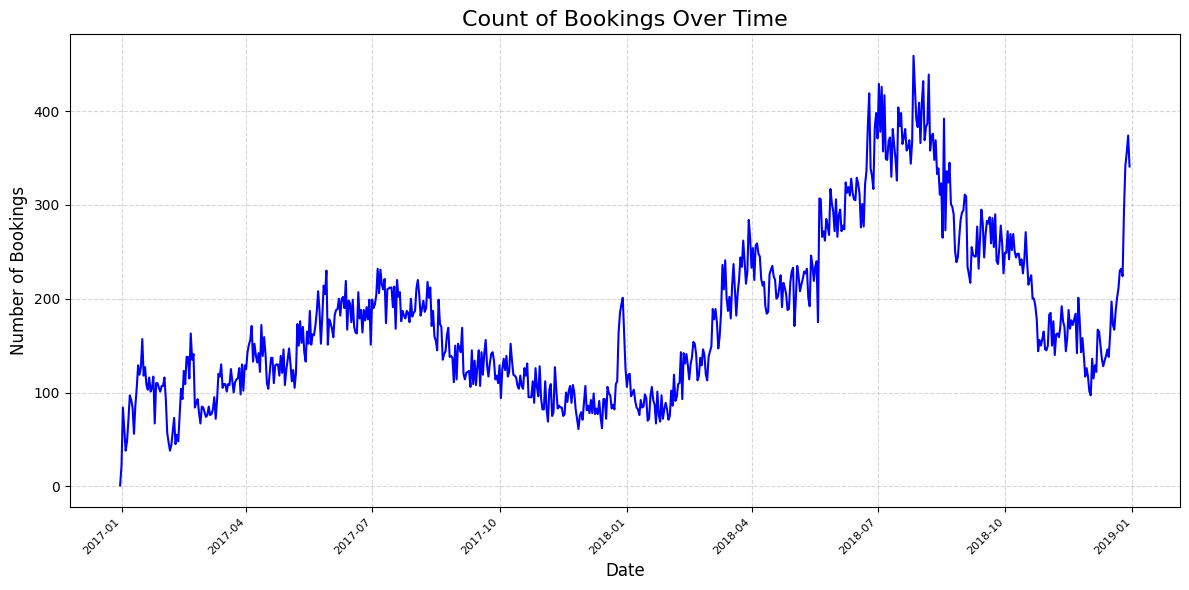

In [16]:
# Extract the date from the "date_of_checkout" column
df_FactOrder["date"] = df_FactOrder["date_of_checkout"].dt.date

# Group the data by date and count the number of bookings
bookings_count = df_FactOrder.groupby("date")["booking_id"].count().reset_index()

# Plot the count of bookings over time
plt.figure(figsize=(12, 6))
sns.lineplot(x="date", y="booking_id", data=bookings_count, color="blue")
plt.title("Count of Bookings Over Time", fontsize=16)
plt.xlabel("Date", fontsize=12)
plt.ylabel("Number of Bookings", fontsize=12)
plt.xticks(rotation=45, ha="right", fontsize=8)
plt.yticks(fontsize=10)
plt.grid(True, linestyle="--", alpha=0.5)
plt.tight_layout()
plt.show()


> This time series, along with further insight, is also done in a Looker Studio dashboard for interested stakeholders:

Based solely on the time series analysis, it is evident that there are significant uptrends in bookings around the December time frame. However, it is important to note that accurately plotting the bookings would require data on the date of booking, rather than just the date of checkout or travel. To ensure accuracy, it is recommended to reconfirm this information with stakeholders or obtain data specifically related to booking dates.

Furthermore, when comparing the growth of bookings, it can be observed that 2018 was a relatively slow year in comparison to the growth achieved in previous years. This suggests that there might have been a deceleration or stagnation in bookings during that particular year.

Please note that these conclusions are based solely on the analysis of the time series data, and further insights and confirmation from relevant stakeholders would be necessary to provide a comprehensive understanding of the booking trends and their underlying factors.

Select * from the weird high value ranges.

SELECT customer_id
COUNT (customer_id) AS number of bookings made per customer


## Task 3.
Analyse our activity categories. Tell us anything interesting you find about how they differ in net revenue (NR) and gross merchandise value (GMV). Are there other differences between categories that you notice?

This is done in Looker Studio.


In [11]:
# Getting hours between checkout and travel
cleaned_fact_orders = pd.read_sql_query("""
    WITH cleaned_fact_order AS (
        SELECT
            customer_id,
            booking_id,
            order_id,
            COUNT(customer_id) AS number_of_customers
        FROM fact_orders
        GROUP BY customer_id, booking_id, order_id
        ORDER BY customer_id
     )
      SELECT *
      FROM cleaned_fact_order
      WHERE number_of_customers > 1

""", conn)

#IDEA TO GROUP BY CUSTOMER_ID AND


,customer_id,booking_id,order_id,number_of_customers
0,00171e5970bb1482f67b212b8a64e8c1,f68106d1b37abf6c0921df5d38b07010,51e60cb52b02817c849142750870b307,2
1,0035a323807939b4fe3d36f3f0aaa201,b8b402f7704f39cacd0f95b11c563555,cbbacbfa3bc573e51e25ea8ea879c713,2
2,0042c659d650327644595c149693a941,3666ee74f4692188d790a9cd36811cfb,96ea67bde52503dcea3d1bb67a405181,2
3,004bc464e505b839bcae4df05d225520,aea0a53ea31f4f938b67d9b6ed5017ba,afc7835fa269aca41ebab02373984ae8,2
4,004c2c69dde8f2be2ad777b1826b7b30,21519fe872e63aa7938bcd54f22d4747,a99fd53e757d2e597e442237e8178772,2
5,004deeb990671a9a72d93f8a12e51a31,4ced3f4e6f0bdcd6cbdbf57699e1722d,2ed5cff868dab0ba5f794e74b0cfc9e3,2
6,0060a0674bb72a3208bcebf7e20a75a2,2fb576b688cdac12efc1b75d3ee8c9ab,7666a41df821744b80b802aa6be071b6,2
7,0061ef134a91db5005eeffc6ff8f71b2,4001e6efc55d17c88a602ad89e974c7a,c917ecee7873965ef85d8e1792821b00,2
8,007703f306b1ec8b2fc00ed9825bc842,db3b7e1c9722a0e1b19dc3d35ba31cf7,5c6cb317a275efa8b18c498ca7f59eef,2
9,0083137053aa4c5110ec5902a0aa98e1,216156367e5dcd631f51aee5e6812471,ba1524127b6d469723eded980b5ddcde,2


## Task 4.
Some devices have unique booking behaviour. What is unique about device_ids 4 and 5?


In [12]:
## Close the database connection
# conn.commit()
# cursor.close()
# conn.close()

In [13]:
# # Display the cleaned dataset
# print(cleaned_fact_orders)
# df.to_csv('cleaned_SIS_faculty_list.csv', index=False)